## <div align="center"> IF540 MACHINE LEARNING </div>
### <div align="center"> UAS : Neural Network </div>
### <div align="center"> Prediksi Tingkat Kasus Covid-19 Berdasarkan Tren Mobilitas Masyarakat <br/> di Asia Tenggara dengan menggunakan Algoritma Neural Network </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [6]:
import datetime
import uuid    

# Fill in your name and NIM
name1 = "Antonius Kevin Budi Saputra"
nim1 = "45444"
name2 = "Chrealvin"
nim2 = "45606"
name3 = "Ela Setiorini"
nim3 = "48258"
name4 = "Muhammad Farrel Prasetyo"
nim4 = "51515"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Kelompok J")
print("Name 1 \t\t: {}".format(name1))
print("NIM 1 \t\t: {}".format(nim1))
print("Name 2 \t\t: {}".format(name2))
print("NIM 2 \t\t: {}".format(nim2))
print("Name 3 \t\t: {}".format(name3))
print("NIM 3 \t\t: {}".format(nim3))
print("Name 4 \t\t: {}".format(name4))
print("NIM 4 \t\t: {}".format(nim4))
print("Start \t\t: {}".format(myDate))
print("Device ID \t: {}".format(myDevice))

Kelompok J
Name 1 		: Antonius Kevin Budi Saputra
NIM 1 		: 45444
Name 2 		: Chrealvin
NIM 2 		: 45606
Name 3 		: Ela Setiorini
NIM 3 		: 48258
Name 4 		: Muhammad Farrel Prasetyo
NIM 4 		: 51515
Start 		: 2022-12-07 21:56:09.272669
Device ID 	: 48ade69c-763f-11ed-9973-068db3350b0b



---

### Dataset yang dipakai:

1. [COVID-19 Stats and Mobility Trends] – sumber : [https://www.kaggle.com/datasets/diogoalex/covid19-stats-and-trends]

### Hasil kerja

---

#### Import Library

In [7]:
import sys
import tensorflow.keras as tk
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [8]:
covid = pd.read_csv("COVID-19.csv", index_col='date', parse_dates=['date'])

In [9]:
covid.head()

,iso,country,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,...,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,AE,United Arab Emirates,4.0,5.0,1.0,0.0,0.0,2.0,8,0,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-16,AE,United Arab Emirates,4.0,4.0,1.0,1.0,1.0,2.0,9,0,...,5042.0,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-17,AE,United Arab Emirates,1.0,5.0,1.0,-1.0,1.0,2.0,9,0,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-18,AE,United Arab Emirates,1.0,5.0,1.0,-2.0,0.0,2.0,9,0,...,6693.0,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-19,AE,United Arab Emirates,0.0,4.0,1.0,-2.0,-1.0,2.0,9,0,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886


In [10]:
np.unique(covid['country'])

array(['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Aruba', 'Australia', 'Austria', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Libya',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali',
       'Malta', 'Mauritius', 'Mexico', 'Moldova',

### Take SouthEast Asia Data

In [11]:
covid_ind = covid[covid['country']=='Indonesia']
covid_mly = covid[covid['country']=='Malaysia']
covid_sg = covid[covid['country']=='Singapore']
covid_th = covid[covid['country']=='Thailand']
covid_vt = covid[covid['country']=='Vietnam']
covid_laos = covid[covid['country']=='Laos']
covid_ph = covid[covid['country']=='Philipines']
covid_cam = covid[covid['country']=='Cambodia']

In [12]:
data = pd.concat([covid_ind, covid_mly, covid_sg, covid_th, covid_vt, covid_laos, covid_ph, covid_cam])

In [13]:
np.unique(data['country'])

array(['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Singapore',
       'Thailand', 'Vietnam'], dtype=object)

In [14]:
covid = data

### Check Correlation between Data

In [15]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,gov_response_stringency_index,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.507787,-0.577338,0.789658,0.732437,0.477889,0.065004,0.056546,-0.333530,0.644449,0.032281,0.026171,0.266336,0.034540,0.092480,0.044633,0.115143,0.235356,0.096514
parks_percent_change_from_baseline,0.507787,1.000000,-0.538879,0.724229,0.611633,0.330226,0.021115,0.066716,-0.416354,0.094385,0.353975,0.350912,0.425693,-0.150927,0.056395,-0.099650,-0.214043,-0.170593,-0.202410
residential_percent_change_from_baseline,-0.577338,-0.538879,1.000000,-0.786703,-0.737449,-0.765523,0.036429,-0.003618,0.437506,-0.593422,0.010288,0.019388,-0.553825,0.503921,-0.088000,0.432110,0.445864,0.183100,0.455830
retail_and_recreation_percent_change_from_baseline,0.789658,0.724229,-0.786703,1.000000,0.792728,0.641194,-0.007969,0.021741,-0.644382,0.499778,0.019094,0.008653,0.284141,-0.201623,0.042976,-0.127628,-0.235867,-0.019463,-0.213573
transit_stations_percent_change_from_baseline,0.732437,0.611633,-0.737449,0.792728,1.000000,0.728171,-0.044919,-0.011969,-0.502199,-0.052906,0.109350,0.098925,0.051521,-0.079374,0.070430,-0.009374,-0.048537,0.048303,-0.161136
workplaces_percent_change_from_baseline,0.477889,0.330226,-0.765523,0.641194,0.728171,1.000000,-0.159527,-0.139163,-0.427859,0.269983,-0.297163,-0.305988,-0.108404,-0.250677,-0.031099,-0.181862,-0.236906,-0.071581,-0.309622
confirmed_cases,0.065004,0.021115,0.036429,-0.007969,-0.044919,-0.159527,1.000000,0.977157,0.193399,0.906529,0.728165,0.729425,0.592159,-0.033388,0.543074,-0.053039,0.037739,-0.100070,0.124699
confirmed_deaths,0.056546,0.066716,-0.003618,0.021741,-0.011969,-0.139163,0.977157,1.000000,0.166735,0.785571,0.721960,0.721372,0.574212,-0.113724,0.629775,-0.114150,-0.043066,-0.146532,0.057448
gov_response_stringency_index,-0.333530,-0.416354,0.437506,-0.644382,-0.502199,-0.427859,0.193399,0.166735,1.000000,-0.056447,0.319317,0.327000,0.611941,0.035715,0.277001,-0.027120,0.222224,0.130120,0.196332
total_tests,0.644449,0.094385,-0.593422,0.499778,-0.052906,0.269983,0.906529,0.785571,-0.056447,1.000000,0.988342,0.988342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2821 entries, 2020-02-15 to 2021-03-23
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   iso                                                 2821 non-null   object 
 1   country                                             2821 non-null   object 
 2   grocery_and_pharmacy_percent_change_from_baseline   2821 non-null   float64
 3   parks_percent_change_from_baseline                  2821 non-null   float64
 4   residential_percent_change_from_baseline            2821 non-null   float64
 5   retail_and_recreation_percent_change_from_baseline  2821 non-null   float64
 6   transit_stations_percent_change_from_baseline       2821 non-null   float64
 7   workplaces_percent_change_from_baseline             2821 non-null   float64
 8   confirmed_cases                                     2821 non

In [17]:
covid.columns

Index(['iso', 'country', 'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline', 'confirmed_cases',
       'confirmed_deaths', 'gov_response_stringency_index', 'total_tests',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'gdp_ppp_per_capita', 'population', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'],
      dtype='object')

### Drop unused Data

In [18]:
covid.drop(columns=['iso', 'country', 
       'gov_response_stringency_index', 'people_fully_vaccinated', 'population',
       'gdp_ppp_per_capita', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'], inplace=True)

In [19]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2821 entries, 2020-02-15 to 2021-03-23
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   2821 non-null   float64
 1   parks_percent_change_from_baseline                  2821 non-null   float64
 2   residential_percent_change_from_baseline            2821 non-null   float64
 3   retail_and_recreation_percent_change_from_baseline  2821 non-null   float64
 4   transit_stations_percent_change_from_baseline       2821 non-null   float64
 5   workplaces_percent_change_from_baseline             2821 non-null   float64
 6   confirmed_cases                                     2821 non-null   int64  
 7   confirmed_deaths                                    2821 non-null   int64  
 8   total_tests                                         401 non-

In [20]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline        0
parks_percent_change_from_baseline                       0
residential_percent_change_from_baseline                 0
retail_and_recreation_percent_change_from_baseline       0
transit_stations_percent_change_from_baseline            0
workplaces_percent_change_from_baseline                  0
confirmed_cases                                          0
confirmed_deaths                                         0
total_tests                                           2420
total_vaccinations                                    2685
people_vaccinated                                     2685
dtype: int64

### Drop NaN data from Total Tests

In [21]:
covid.dropna(subset=['total_tests'], inplace=True)

In [22]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,total_tests,total_vaccinations,people_vaccinated
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.584324,-0.674230,0.799249,0.456517,0.306469,0.589723,0.494550,0.644449,-0.692912,-0.692912
parks_percent_change_from_baseline,0.584324,1.000000,-0.541261,0.807661,0.714959,0.104093,-0.052224,-0.019829,0.094385,-0.351817,-0.351817
residential_percent_change_from_baseline,-0.674230,-0.541261,1.000000,-0.865762,-0.713738,-0.737159,-0.413028,-0.318376,-0.593422,0.438048,0.438048
retail_and_recreation_percent_change_from_baseline,0.799249,0.807661,-0.865762,1.000000,0.756697,0.463763,0.329129,0.280028,0.499778,-0.229025,-0.229025
transit_stations_percent_change_from_baseline,0.456517,0.714959,-0.713738,0.756697,1.000000,0.578051,-0.184403,-0.212480,-0.052906,0.465937,0.465937
workplaces_percent_change_from_baseline,0.306469,0.104093,-0.737159,0.463763,0.578051,1.000000,0.227183,0.015667,0.269983,0.866127,0.866127
confirmed_cases,0.589723,-0.052224,-0.413028,0.329129,-0.184403,0.227183,1.000000,0.658208,0.906529,0.986028,0.986028
confirmed_deaths,0.494550,-0.019829,-0.318376,0.280028,-0.212480,0.015667,0.658208,1.000000,0.785571,0.991120,0.991120
total_tests,0.644449,0.094385,-0.593422,0.499778,-0.052906,0.269983,0.906529,0.785571,1.000000,0.988342,0.988342
total_vaccinations,-0.692912,-0.351817,0.438048,-0.229025,0.465937,0.866127,0.986028,0.991120,0.988342,1.000000,1.000000


In [23]:
covid.fillna(0, inplace=True)

### Check Correlation between Data Again

In [24]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,total_tests,total_vaccinations,people_vaccinated
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.584324,-0.674230,0.799249,0.456517,0.306469,0.589723,0.494550,0.644449,0.128056,0.128056
parks_percent_change_from_baseline,0.584324,1.000000,-0.541261,0.807661,0.714959,0.104093,-0.052224,-0.019829,0.094385,0.006824,0.006824
residential_percent_change_from_baseline,-0.674230,-0.541261,1.000000,-0.865762,-0.713738,-0.737159,-0.413028,-0.318376,-0.593422,-0.091492,-0.091492
retail_and_recreation_percent_change_from_baseline,0.799249,0.807661,-0.865762,1.000000,0.756697,0.463763,0.329129,0.280028,0.499778,0.084742,0.084742
transit_stations_percent_change_from_baseline,0.456517,0.714959,-0.713738,0.756697,1.000000,0.578051,-0.184403,-0.212480,-0.052906,0.014069,0.014069
workplaces_percent_change_from_baseline,0.306469,0.104093,-0.737159,0.463763,0.578051,1.000000,0.227183,0.015667,0.269983,0.088173,0.088173
confirmed_cases,0.589723,-0.052224,-0.413028,0.329129,-0.184403,0.227183,1.000000,0.658208,0.906529,0.198312,0.198312
confirmed_deaths,0.494550,-0.019829,-0.318376,0.280028,-0.212480,0.015667,0.658208,1.000000,0.785571,0.105470,0.105470
total_tests,0.644449,0.094385,-0.593422,0.499778,-0.052906,0.269983,0.906529,0.785571,1.000000,0.168305,0.168305
total_vaccinations,0.128056,0.006824,-0.091492,0.084742,0.014069,0.088173,0.198312,0.105470,0.168305,1.000000,1.000000


In [25]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
residential_percent_change_from_baseline              0
retail_and_recreation_percent_change_from_baseline    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
confirmed_cases                                       0
confirmed_deaths                                      0
total_tests                                           0
total_vaccinations                                    0
people_vaccinated                                     0
dtype: int64

In [26]:
covid.shape

(401, 11)

In [27]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 401 entries, 2020-02-15 to 2021-03-21
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   401 non-null    float64
 1   parks_percent_change_from_baseline                  401 non-null    float64
 2   residential_percent_change_from_baseline            401 non-null    float64
 3   retail_and_recreation_percent_change_from_baseline  401 non-null    float64
 4   transit_stations_percent_change_from_baseline       401 non-null    float64
 5   workplaces_percent_change_from_baseline             401 non-null    float64
 6   confirmed_cases                                     401 non-null    int64  
 7   confirmed_deaths                                    401 non-null    int64  
 8   total_tests                                         401 non-n

### Move Confirmed_Case Data to last Column

In [28]:
moved_column = covid.pop("confirmed_cases")

In [29]:
covid.insert(10, "confirmed_cases", moved_column)

In [30]:
covid.head()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_deaths,total_tests,total_vaccinations,people_vaccinated,confirmed_cases
date,,,,,,,,,,,
2020-02-15,1.0,-8.0,1.0,-3.0,-2.0,7.0,0,2930.0,0.0,0.0,34
2020-02-16,2.0,-5.0,2.0,-3.0,-4.0,2.0,0,2963.0,0.0,0.0,34
2020-02-17,1.0,-3.0,1.0,-3.0,-4.0,2.0,0,3088.0,0.0,0.0,35
2020-02-18,0.0,-5.0,2.0,-3.0,-6.0,0.0,0,3212.0,0.0,0.0,35
2020-02-19,-3.0,-3.0,1.0,-4.0,-6.0,0.0,0,3400.0,0.0,0.0,35


### Collect Covid DF Data as Values

In [31]:
covid_data = covid.values

In [32]:
covid_data

array([[ 1.0000e+00, -8.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  3.4000e+01],
       [ 2.0000e+00, -5.0000e+00,  2.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  3.4000e+01],
       [ 1.0000e+00, -3.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  3.5000e+01],
       ...,
       [ 2.1000e+01, -1.9000e+01, -2.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  2.7594e+04],
       [ 2.0000e+01, -2.0000e+01, -3.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  2.7713e+04],
       [ 2.0000e+01, -1.2000e+01, -3.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  2.7803e+04]])

In [33]:
X = covid_data[:,0:10]

In [34]:
X.shape

(401, 10)

In [35]:
Y = covid_data[:, 10]

In [36]:
Y[:10]

array([34., 34., 35., 35., 35., 35., 35., 35., 35., 35.])

In [37]:
np.max(Y)

27803.0

In [38]:
np.min(Y)

34.0

### Plot data to see Data Scatters/Spreading

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

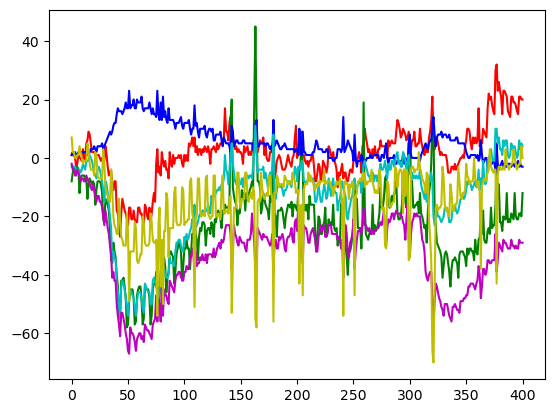

In [40]:
plt.plot(X[:,0], color="r", label="grocery")
plt.plot(X[:,1], color="g", label="park")
plt.plot(X[:,2], color="b", label="residential")
plt.plot(X[:,3], color="c", label="retail")
plt.plot(X[:,4], color="m", label="transit")
plt.plot(X[:,5], color="y", label="workplace")
plt.show()

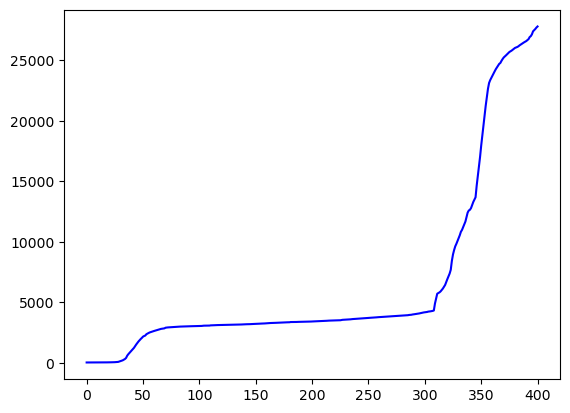

In [41]:
plt.plot(Y, color="b", label='Confirmed_case')
plt.show()

### Scale data with MinMaxScaler for Input and Output Attribute

In [42]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

### Devide Data to X and Y Variable

In [43]:
Y_scaled = Y

In [68]:
Y

array([   34.,    34.,    35.,    35.,    35.,    35.,    35.,    35.,
          35.,    35.,    37.,    40.,    40.,    40.,    40.,    42.,
          43.,    43.,    43.,    47.,    48.,    50.,    50.,    50.,
          53.,    59.,    70.,    75.,    82.,   114.,   147.,   177.,
         212.,   272.,   322.,   411.,   599.,   721.,   827.,   934.,
        1045.,  1136.,  1245.,  1388.,  1524.,  1651.,  1771.,  1875.,
        1978.,  2067.,  2169.,  2220.,  2258.,  2369.,  2423.,  2473.,
        2518.,  2551.,  2579.,  2613.,  2643.,  2672.,  2700.,  2733.,
        2765.,  2792.,  2811.,  2826.,  2839.,  2854.,  2907.,  2922.,
        2931.,  2938.,  2947.,  2954.,  2960.,  2966.,  2969.,  2987.,
        2988.,  2989.,  2992.,  3000.,  3004.,  3009.,  3015.,  3017.,
        3017.,  3018.,  3025.,  3026.,  3028.,  3031.,  3033.,  3034.,
        3037.,  3038.,  3040.,  3041.,  3042.,  3045.,  3054.,  3065.,
        3076.,  3077.,  3081.,  3082.,  3083.,  3084.,  3101.,  3102.,
      

### Plot data to see Scaled Data Scatters/Spreading

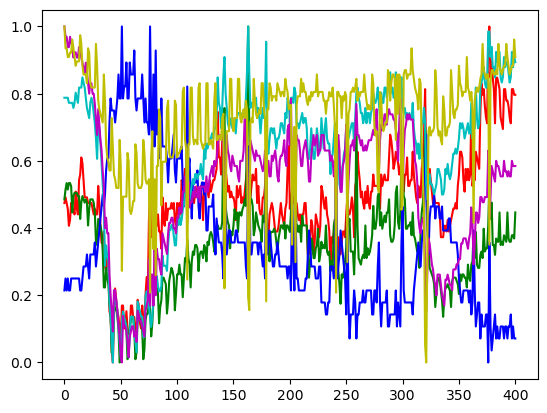

In [44]:
plt.plot(X_scaled[:,0], color="r", label="grocery")
plt.plot(X_scaled[:,1], color="g", label="park")
plt.plot(X_scaled[:,2], color="b", label="residential")
plt.plot(X_scaled[:,3], color="c", label="retail")
plt.plot(X_scaled[:,4], color="m", label="transit")
plt.plot(X_scaled[:,5], color="y", label="workplace")
plt.show()

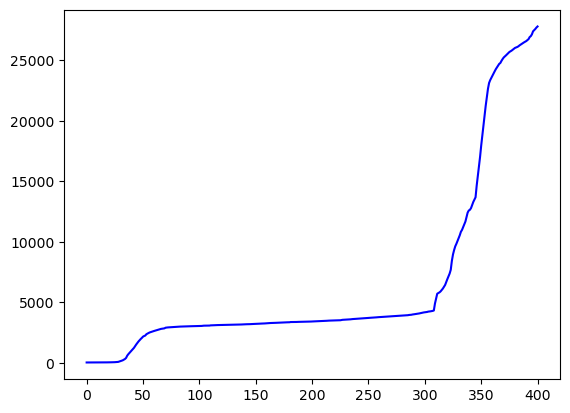

In [45]:
plt.plot(Y_scaled, color="b", label='Confirmed_case')
plt.show()

### Splitting Data to 80% Training Data, 10% Test Data, 10% Validation Data

##### Random State
    Digunakan untuk memastikan supaya setiap kali dilakuakn splitting data, maka pembagian data akan selalu sama dan tidak ada akan menimbulkan variabel test, train, dan validation yang berbeda

In [69]:
X_train, X_vt, Y_train, Y_vt = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [70]:
X_test, X_val, Y_test, Y_val = train_test_split(X_vt, Y_vt, test_size=0.5, random_state=42)

In [71]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(320, 10) (41, 10) (40, 10) (320,) (41,) (40,)


### Import Required Library

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Model Initialization

In [72]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(10,)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

### Compile Model

In [73]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Start Training and Fitting the Model

In [74]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=100, 
          validation_data=(X_val, Y_val))

Epoch 1/100
3/3 [==============================] - 0s 47ms/step - loss: -1892.1328 - accuracy: 0.0000e+00 - val_loss: -5793.7998 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: -5737.5522 - accuracy: 0.0000e+00 - val_loss: -11126.7432 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: -10557.3037 - accuracy: 0.0000e+00 - val_loss: -17573.2500 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: -16035.7715 - accuracy: 0.0000e+00 - val_loss: -25903.0391 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: -24182.3535 - accuracy: 0.0000e+00 - val_loss: -36683.1250 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: -33308.0312 - accuracy: 0.0000e+00 - val_loss: -50369.0859 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 1

### Evaluate Model to Test Data

In [76]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 3ms/step - loss: -174317264.0000 - accuracy: 0.0000e+00


[-174317264.0, 0.0]

### Prediction For X_Test Data

In [77]:
model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [55]:
test = model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


### Plot Model to see Model Movement

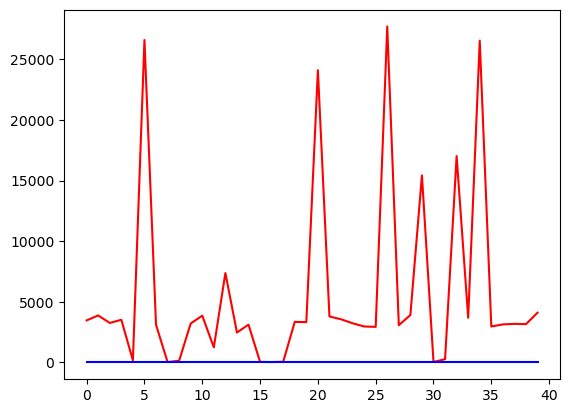

In [56]:
plt.plot(Y_test, color='r', label="RealData")
plt.plot(test, color='b', label='Predicted Test')
plt.show()

### Convert from scaled data to Real Value for Prediction Result and Real Data (X_test, Y_test)

In [57]:
test_value = []
for t in test:
    x = np.min(Y)
    y = np.max(Y) - np.min(Y)
    test_value.append((t * y) + x)
test_value

[array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27803.], dtype=float32),
 array([27

In [58]:
Y_test_value = []
for t in Y_test:
    x = np.min(Y)
    y = np.max(Y) - np.min(Y)
    Y_test_value.append((t * y) + x)
Y_test_value

[96441771.0,
 107743754.0,
 90554743.0,
 97830221.0,
 4915147.0,
 738599896.0,
 86417162.0,
 971949.0,
 4082077.0,
 89332907.0,
 107216143.0,
 34572439.0,
 204907485.0,
 68672771.0,
 86611545.0,
 1388484.0,
 944180.0,
 1638405.0,
 93053953.0,
 92415266.0,
 669344010.0,
 105438927.0,
 98968750.0,
 89860518.0,
 82446195.0,
 81585356.0,
 769562331.0,
 85417478.0,
 108660131.0,
 428559011.0,
 1166332.0,
 7553202.0,
 472711721.0,
 102495413.0,
 736989294.0,
 82362888.0,
 87222463.0,
 88444299.0,
 87805612.0,
 114047317.0]

### Plot Model based on Real Data

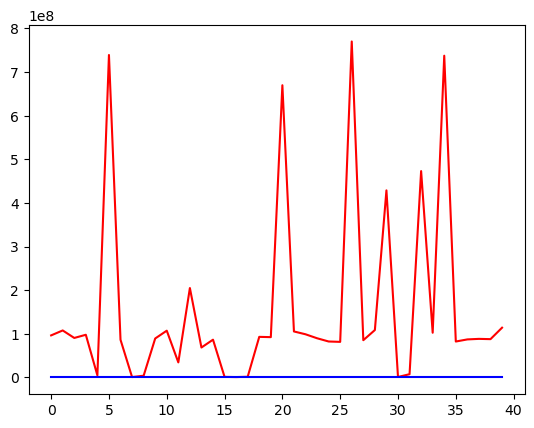

In [59]:
plt.plot(Y_test_value, color='r', label="RealData")
plt.plot(test_value, color='b', label='Predicted Test')
plt.show()

### Plot Model Loss

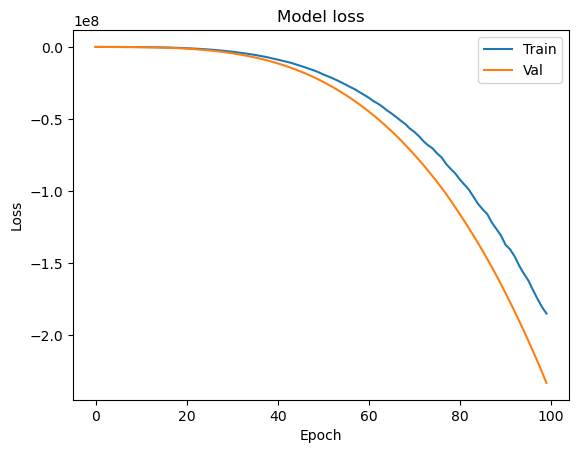

In [60]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Plot Model Accuracy

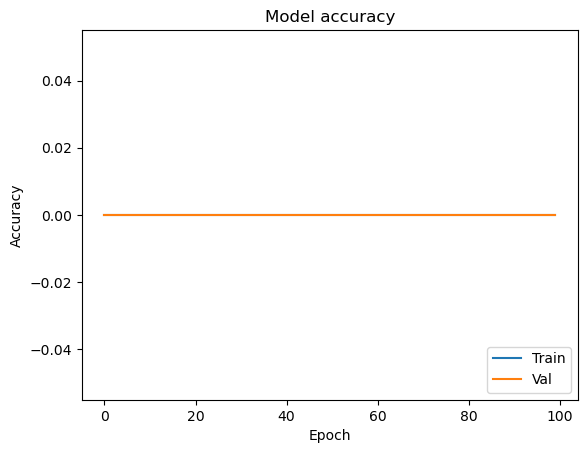

In [61]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Train Model with different Input and Hidden Layer

In [62]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dropout(0.8),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
10/10 [==============================] - 0s 17ms/step - loss: -387906.7812 - accuracy: 0.0000e+00 - val_loss: -2947698.7500 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: -15933189.0000 - accuracy: 0.0000e+00 - val_loss: -60795636.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: -157593088.0000 - accuracy: 0.0000e+00 - val_loss: -480889792.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: -949333504.0000 - accuracy: 0.0000e+00 - val_loss: -2500143616.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: -4279791104.0000 - accuracy: 0.0000e+00 - val_loss: -9893228544.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: -14977392640.0000 - accuracy: 0.0000e+00 - val_loss: -32016939008.0000 - val_accuracy: 0.0000e+00
Epo

### Plot Model for X Test and Y Test

2/2 [==============================] - 0s 2ms/step


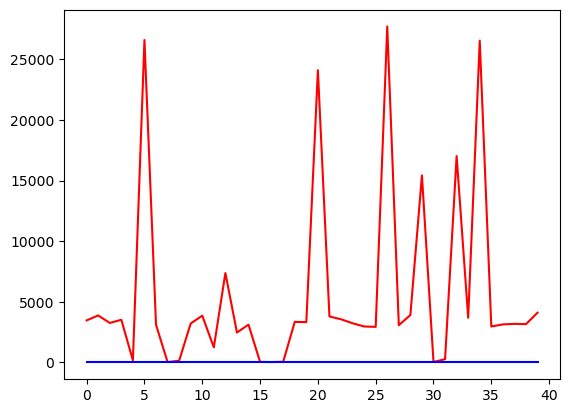

In [63]:
test = model_2.predict(X_test)
plt.plot(Y_test, color='r', label="RealData")
plt.plot(test, color='b', label='Predicted Test')
plt.show()

### Plot Model Loss

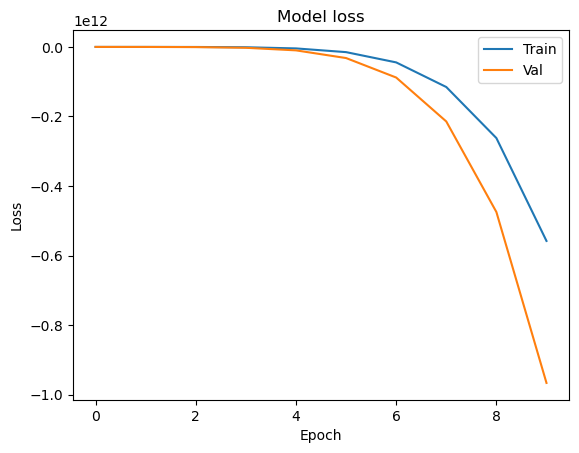

In [64]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Plot Model Accuracy

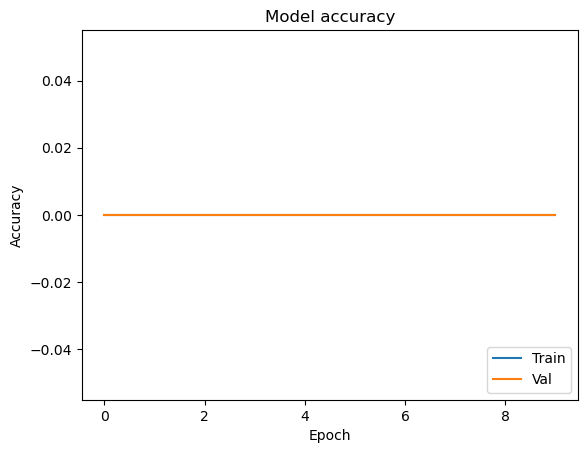

In [65]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [66]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Kelompok J")
print("Name 1 \t\t: {}".format(name1))
print("NIM 1 \t\t: {}".format(nim1))
print("Name 2 \t\t: {}".format(name2))
print("NIM 2 \t\t: {}".format(nim2))
print("Name 3 \t\t: {}".format(name3))
print("NIM 3 \t\t: {}".format(nim3))
print("Name 4 \t\t: {}".format(name4))
print("NIM 4 \t\t: {}".format(nim4))
print("Time-stamp \t: {}".format(myDate))
print("Device ID \t: {}".format(myDevice))

I certify that this is my own work.
Signed by:
Kelompok J
Name 1 		: Antonius Kevin Budi Saputra
NIM 1 		: 45444
Name 2 		: Chrealvin
NIM 2 		: 45606
Name 3 		: Ela Setiorini
NIM 3 		: 48258
Name 4 		: Muhammad Farrel Prasetyo
NIM 4 		: 51515
Time-stamp 	: 2022-12-07 21:56:16.422250
Device ID 	: 48ade69c-763f-11ed-9973-068db3350b0b


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [67]:
!jupyter nbconvert --to html "./IF540L_ProjectUAS_Kelompok J.ipynb" --output-dir="./"

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook ./IF540L_ProjectUAS_Kelompok J.ipynb to html
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/nbformat/__init__.py:92: DuplicateCellId: Non-unique cell id '44dc37e5' detected. Corrected to 'a0bbb87b'.
  validate(nb)
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/nbformat/__init__.py:92: DuplicateCellId: Non-unique cell id '44dc37e5' detected. Corrected to '236fc8c7'.
  validate(nb)
[NbConvertApp] Writing 1313688 bytes to IF540L_ProjectUAS_Kelompok J.html
